<a href="https://colab.research.google.com/github/preetamjumech/bagging-step-by-step-calcualation/blob/main/Bagging_stepbystep_explanation_27_11_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
# load iris dataset
iris = datasets.load_iris()
# Since this is a bunch, create a dataframe
iris_df=pd.DataFrame(iris.data)
iris_df['Species']=iris.target

iris_df.columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
df = iris_df[iris_df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


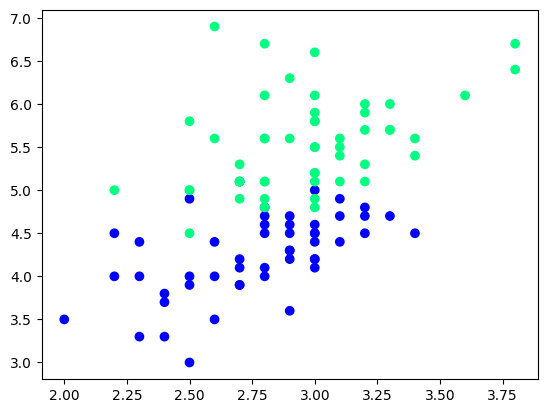

In [28]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [29]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
103,2.9,5.6,2
70,3.2,4.8,1
72,2.5,4.9,1
95,3.0,4.2,1
56,3.3,4.7,1
92,2.6,4.0,1
55,2.8,4.5,1
91,3.0,4.6,1
65,3.1,4.4,1
94,2.7,4.2,1


In [30]:
# Taking only 10 rows for training just for better understanding
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [31]:
df_train

,SepalWidthCm,PetalLengthCm,Species
144,3.3,5.7,2
61,3.0,4.2,1
142,2.7,5.1,2
76,2.8,4.8,1
124,3.3,5.7,2
68,2.2,4.5,1
123,2.7,4.9,2
80,2.4,3.8,1
103,2.9,5.6,2
134,2.6,5.6,2


In [32]:
df_val

,SepalWidthCm,PetalLengthCm,Species
119,2.2,5.0,2
140,3.1,5.6,2
78,2.9,4.5,1
54,2.8,4.6,1
113,2.5,5.0,2


In [33]:
df_test

,SepalWidthCm,PetalLengthCm,Species
135,3.0,6.1,2
64,2.9,3.6,1
146,2.5,5.0,2
69,2.5,3.9,1
115,3.2,5.3,2


In [35]:
# test data for evaluation
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [36]:
y_test

array([2, 2, 1, 1, 2])

### Case 1 - Bagging

In [37]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
134,2.6,5.6,2
68,2.2,4.5,1
124,3.3,5.7,2
144,3.3,5.7,2
68,2.2,4.5,1
123,2.7,4.9,2
144,3.3,5.7,2
124,3.3,5.7,2


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [39]:
dt_bag1 = DecisionTreeClassifier()

In [40]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

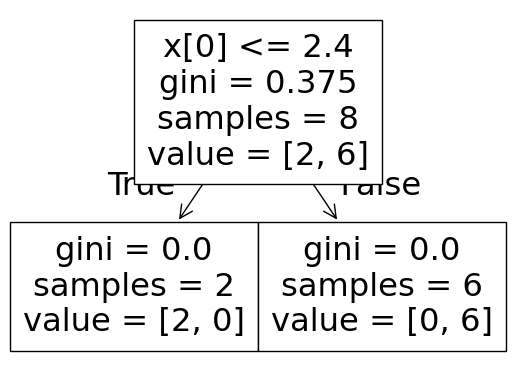

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.4


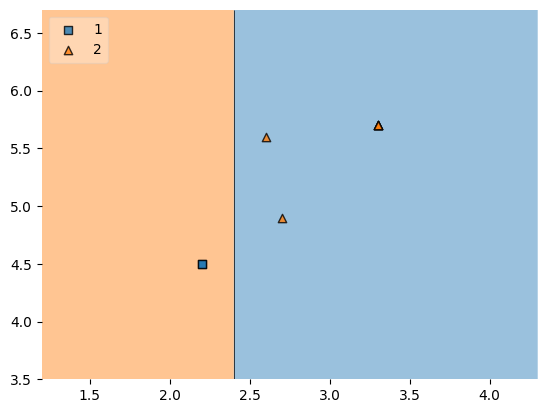

In [41]:
#For first decision Tree
evaluate(dt_bag1,X,y)

In [42]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
144,3.3,5.7,2
103,2.9,5.6,2
68,2.2,4.5,1
80,2.4,3.8,1
61,3.0,4.2,1
68,2.2,4.5,1
124,3.3,5.7,2
123,2.7,4.9,2


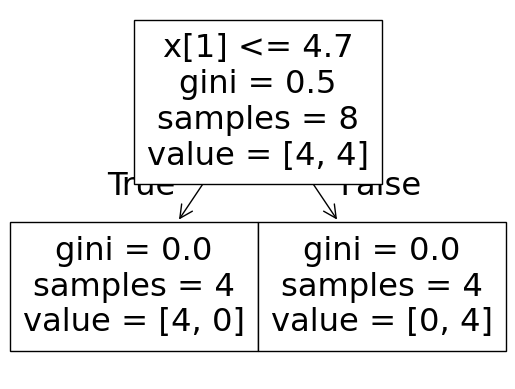

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


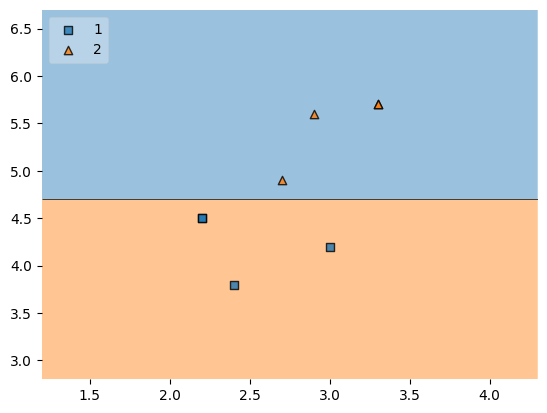

In [43]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [44]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
134,2.6,5.6,2
80,2.4,3.8,1
80,2.4,3.8,1
80,2.4,3.8,1
142,2.7,5.1,2
142,2.7,5.1,2
76,2.8,4.8,1
68,2.2,4.5,1


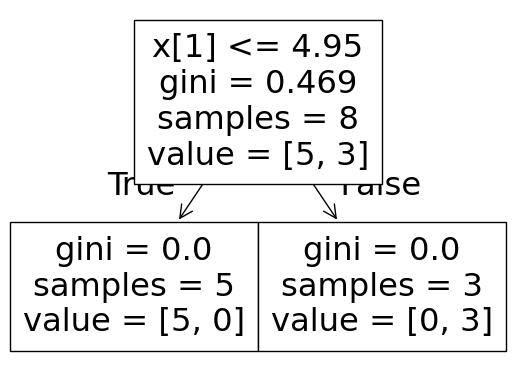

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


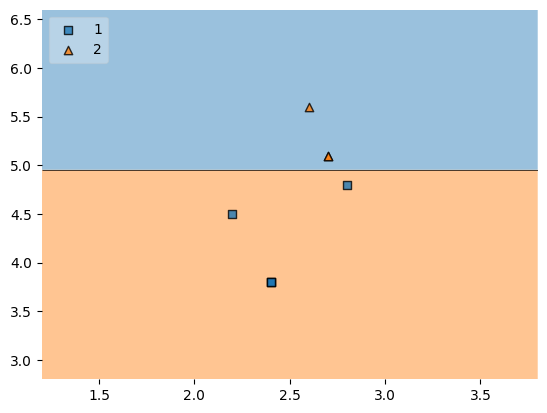

In [45]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [46]:
## test on df_test (unseen data)
df_test

,SepalWidthCm,PetalLengthCm,Species
135,3.0,6.1,2
64,2.9,3.6,1
146,2.5,5.0,2
69,2.5,3.9,1
115,3.2,5.3,2


In [47]:
print("Predictor 1",dt_bag1.predict(np.array([3.0,6.1]).reshape(1,2))) # test with the value of first row from the above table
print("Predictor 2",dt_bag2.predict(np.array([3.0,6.1]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.0,6.1]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### 2. Pasting

In [48]:
# Row sampling without replacement ( in bagging its with replacement)

df_train

,SepalWidthCm,PetalLengthCm,Species
144,3.3,5.7,2
61,3.0,4.2,1
142,2.7,5.1,2
76,2.8,4.8,1
124,3.3,5.7,2
68,2.2,4.5,1
123,2.7,4.9,2
80,2.4,3.8,1
103,2.9,5.6,2
134,2.6,5.6,2


In [49]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
124,3.3,5.7,2
142,2.7,5.1,2
61,3.0,4.2,1
123,2.7,4.9,2
103,2.9,5.6,2
134,2.6,5.6,2
76,2.8,4.8,1
80,2.4,3.8,1


### 3. Random Subspaces

In [51]:
# Column sampling (with or without replacement ) but no row sampling
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [54]:
iris_df.sample(2,replace=True,axis=1)

,SepalWidthCm,PetalLengthCm
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4
...,...,...
145,3.0,5.2
146,2.5,5.0
147,3.0,5.2
148,3.4,5.4


### 3. Random Patches

In [56]:
# both row sampling and column sampling together
iris_df.sample(8,replace=True,axis=0).sample(2,replace=True,axis=1)

,SepalLengthCm,Species
3,4.6,0
87,6.3,1
73,6.1,1
108,6.7,2
24,4.8,0
110,6.5,2
70,5.9,1
35,5.0,0
